<h1><center>Laboratorio 7: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Otoño 2025</strong></center>

### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Florencia Vargas
- Nombre de alumno 2: Mario Romero


### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/...../)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
try:
    from google.colab import drive
    drive.mount("/content/drive")


except:
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

#ruta mario
df = pd.read_csv('/content/drive/MyDrive/diabetes_data.csv')
#ruta flo:

df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [3]:
!pip install xgboost

In [4]:
# explicacion de los datos
df.dtypes


,0
Age,float64
Sex,float64
HighChol,float64
CholCheck,float64
BMI,float64
Smoker,float64
HeartDiseaseorAttack,float64
PhysActivity,float64
Fruits,float64
Veggies,float64


Segun ki visto el tipo de datos esta bien. solo que por lo visto anteriormente, necesitamos estandirzar algunas col

In [5]:
print(df.min())
print(df.max())

Age                      1.0
Sex                      0.0
HighChol                 0.0
CholCheck                0.0
BMI                     12.0
Smoker                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             0.0
Fruits                   0.0
Veggies                  0.0
HvyAlcoholConsump        0.0
GenHlth                  1.0
MentHlth                 0.0
PhysHlth                 0.0
DiffWalk                 0.0
Stroke                   0.0
HighBP                   0.0
Diabetes                 0.0
dtype: float64
Age                     13.0
Sex                      1.0
HighChol                 1.0
CholCheck                1.0
BMI                     98.0
Smoker                   1.0
HeartDiseaseorAttack     1.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        1.0
GenHlth                  5.0
MentHlth                30.0
PhysHlth                30.0
DiffWalk                 1.0
Stroke                   1.0

ahora veremos correlacion entre variables, para no ser reduantes

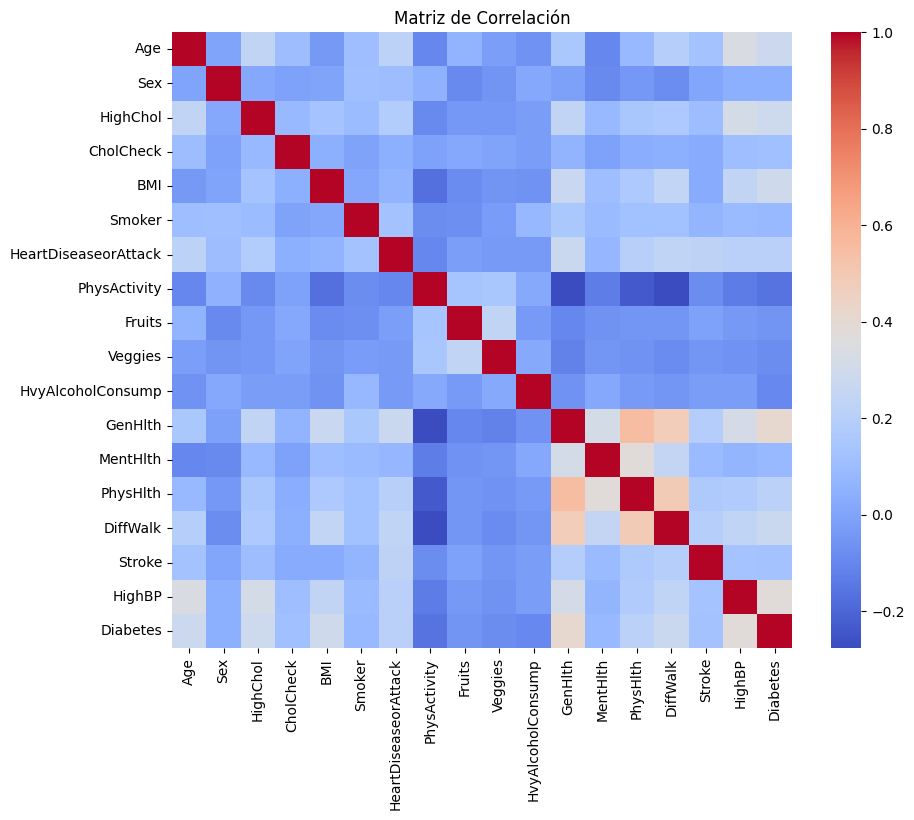

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr,  cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


1. voy a elimianr PhysHlth, MentHlth, DiffWalk y me quedo con GenHlth

2. voy a eliminar HighChol y  me quedo con HighBP

In [7]:
col_to_drop_ = ['PhysHlth','MentHlth','DiffWalk','HighChol']

In [8]:
df = df.drop(columns=col_to_drop_)

ahora estanderizo las que tienen otras medidas, como highbp, con el objetivo que no altere el modelo

In [9]:
df.head()

,Age,Sex,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,Stroke,HighBP,Diabetes
0,4.0,1.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0
1,12.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,0.0
2,13.0,1.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,11.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0
4,8.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0


In [10]:
col_estand= ['Age','BMI','GenHlth']

In [11]:
# separamos target

x = df.drop(columns=['Diabetes'])
y = df['Diabetes'] # sacamos la var a predecir

# ahora definimos dataset de entreno y test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [12]:


import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# 1. Detectar automáticamente todas las columnas numéricas (excluyendo tu target)
num_cols = (
    x_train
    .select_dtypes(include=[np.number])         # todas las numéricas
    .columns
    .drop('Diabetes', errors='ignore')           # quita la columna target si estuviera
    .tolist()
)

# 2. Construir el ColumnTransformer con esas columnas
col_transformer = ColumnTransformer(
    [('num_std', StandardScaler(), num_cols)],
    verbose_feature_names_out=False
).set_output(transform='pandas')


In [13]:
#el pipe, con el col transfoermer definido arriba

from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('preprocessing', col_transformer),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1)) #logloss para ev binaria
])


In [14]:
#entrenamos
pipeline.fit(x_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:32:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_std', StandardScaler(),
                                                  ['Age', 'Sex', 'CholCheck',
                                                   'BMI', 'Smoker',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'GenHlth', 'Stroke',
                                                   'HighBP'])],
                                   verbose_feature_names_out=False)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               col...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=1, ...))])

In [15]:
#evaluamos
y_pred = pipeline.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.70      0.73     11788
         1.0       0.72      0.79      0.76     11541

    accuracy                           0.75     23329
   macro avg       0.75      0.75      0.74     23329
weighted avg       0.75      0.75      0.74     23329



1. es un predictor decente, mejor que lanzar una moneda. aunque con bastante margen de mejora

2. la recision, mide que diagnostivos de diabetes positivo era verdaderamente diabetes. recall mide  cuantos positivos reales fueron bien detectados y f-1 el balance.

macro: es e promedio entre ambas clases
el wiigh pondera la clase por el numero de muestra (lo usamos cdo hay desbalance)

3. No, estas metricas quedan cortas. se necesita¿ medir la importancia de las variables. ademas hicimos una eleccion antes con la matriz de correlacion.

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

In [16]:
# acceedemos al modelo
xgb_model = pipeline.named_steps['classifier']

# accesdemos a los nombres de las col
feature_names = pipeline.named_steps['preprocessing'].get_feature_names_out()

In [17]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

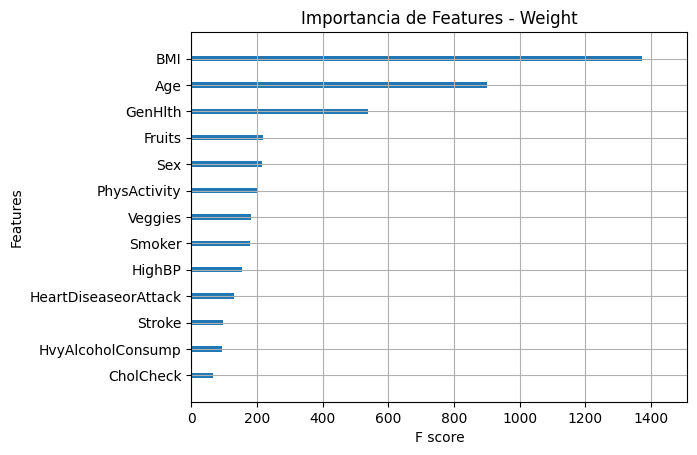

In [18]:
# 1. weight
plt.figure(figsize=(10, 6))
plot_importance(
    xgb_model,
    importance_type='weight',
    max_num_features=15,
    title='Importancia de Features - Weight',
    show_values=False
)
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

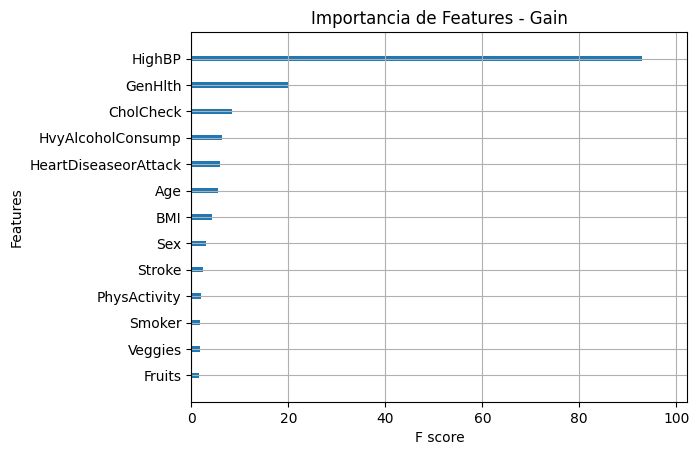

In [19]:
#2. gain
plt.figure(figsize=(10, 6))
plot_importance(
    xgb_model,
    importance_type='gain',
    max_num_features=15,
    title='Importancia de Features - Gain',
    show_values=False
)
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

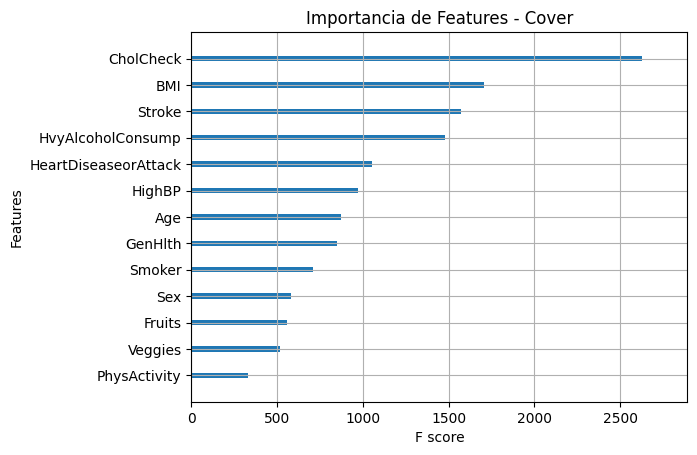

In [20]:
# 3. cover
plt.figure(figsize=(10, 6))
plot_importance(
    xgb_model,
    importance_type='cover',
    max_num_features=15,
    title='Importancia de Features - Cover',
    show_values=False
)
plt.grid(True)
plt.show()

2. los resultados no son comprables, por q cada metrica busca medir algo distinto.

La importancoia hecha de esta forma no son lo suficientmente fuertes para interpretar, solo dan nociones. para este caso las 3 variables que se repitieron en los 3 graficos son relevantes. La principal debilidad es que no explican  las predicciones (osea no sabemos como esta calsificando)

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

In [21]:
#1.

from sklearn.inspection import permutation_importance
# nombres de col post transformacion, con el hint
feature_names = pipeline.named_steps['preprocessing'].get_feature_names_out()

# trnasformamos x test para que el modelo lo reciba cen el mismo orden q entreno
X_test_transformed = pipeline.named_steps['preprocessing'].transform(x_test)


In [22]:
#2.
#hacemos una lista para guardar la importancia
lista = []

for i in range(30):
    result = permutation_importance(
        xgb_model,
        X_test_transformed,
        y_test,
        n_repeats=1, # una repeticion por ciclo
        random_state=i,
        scoring='f1' # metodo de importancia escogifo
    )

    lista.append(result.importances_mean)

#ahora la pasamos a arreglo
scores_array = np.array(lista)

In [23]:
# ahora calculamos las metricas: prom y std
mean_scores = np.mean(scores_array, axis=0)
std_scores = np.std(scores_array, axis=0)

In [24]:
# el array lo pasamos a df

df_perm = pd.DataFrame({
    'feature': feature_names,
    'mean_importance': mean_scores,
    'std_importance': std_scores
}).sort_values(by='mean_importance', ascending=False)

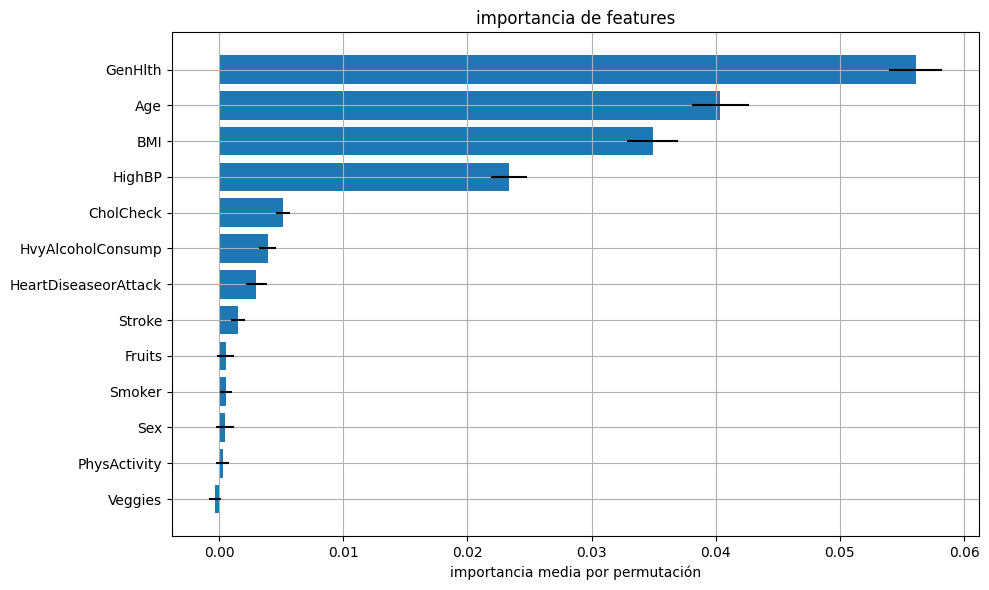

In [25]:
#visualizamos
plt.figure(figsize=(10, 6))
plt.barh(df_perm['feature'], df_perm['mean_importance'], xerr=df_perm['std_importance'])
plt.xlabel("importancia media por permutación")
plt.title("importancia de features")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


primero, la desviacion indica que tan estable es la importancia de la caracteritica. ideal seria tener una desv baja.


Para medir la importanciam usamos ek f-1 (que balancea precision y recall). usamos un metodo agnostico(no necesita saber como funciona el modelo y se puede usar para otros)  al modelo que caputra relaciones lineal y no lineales.


LAs features con mayor impacto son: GenHth, age y BMMI, de hecho estan muy correlacionadas a la diabetes cuando vimos la matriz. tienen mucho sentido medico. En general se mantienen las conclusiones, solo que cambia el orden de relevancia.

Ventajas modelo: que sea agnotico (universal), facil de interpretar y es mas relevante que el visto en el paso anterior para explicar la importancia.

Desventajas; costo computacional (evaluamos 30 veces el modelo), sensible al azar (necesitas muchas estimaciones), sensible a las correlaciones (ya que si dos estan correlacionadas la permutacion no lo separa)

## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [26]:
!pip install shap

In [27]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [28]:
import shap

#  explainer de cgb
explainer = shap.Explainer(pipeline.named_steps['classifier'])

# transformamos  x test (nuevamente) usando el preprocesador del pipeline.
x_test_transformed = pipeline.named_steps['preprocessing'].transform(x_test)

# SHAP values
shap_values = explainer(x_test_transformed)



CAda valor se puede ver como esa variable "empuja" a clasificar el paciente, esto para cada paciente. El caso de un shap value negativo empuja al clasificador hacia el "no tener diabetes" y el positvo lo contrario.

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

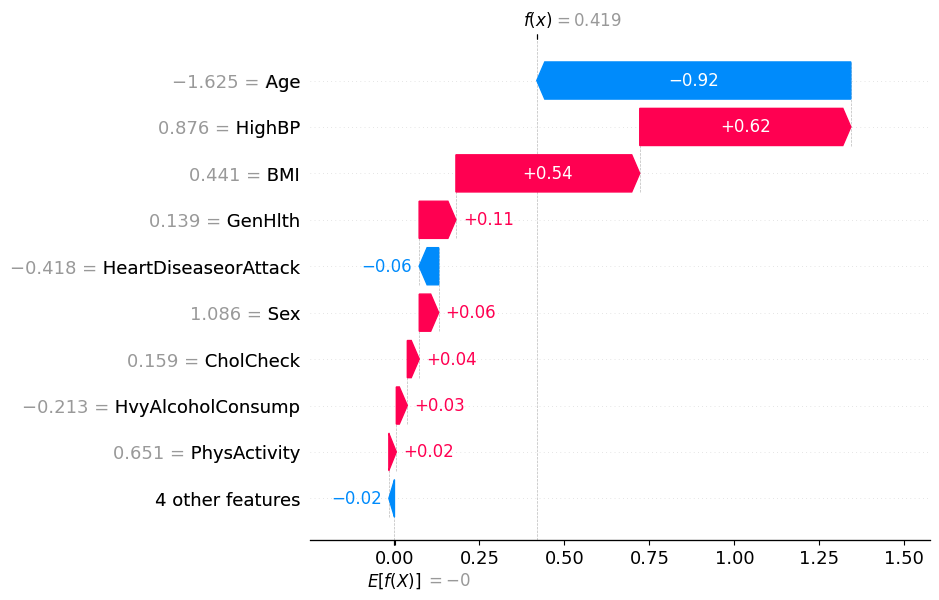

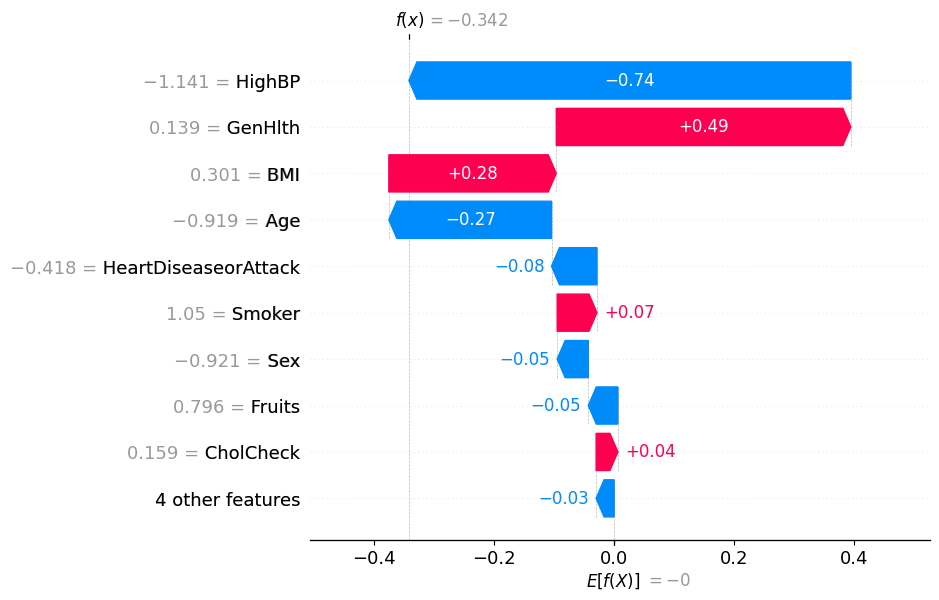

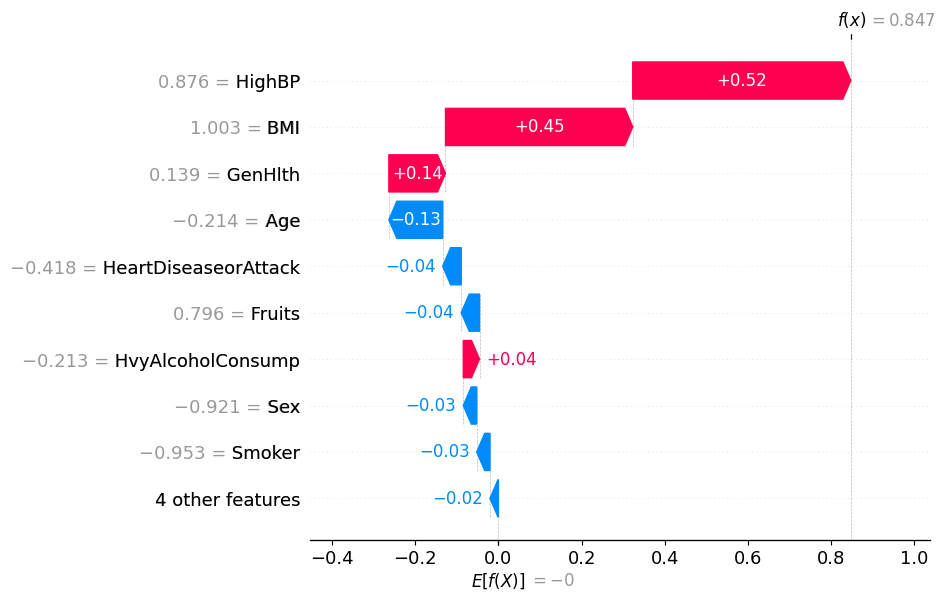

In [29]:
# printea una predicicon
shap.plots.waterfall(shap_values[1])
shap.plots.waterfall(shap_values[19])
shap.plots.waterfall(shap_values[150])

la idea del grafico de waterfall es mostrar como la variabnle contribuye a la clasificacion final. para este caso se parte de una base pequeña de 0.001 y luego cada una de las var empuja a clasificar. en este caso si se suman las 3, queda en -0.53 lo que dice que probablemente no tenfa diabetes.

Las variables que "suman" a tener diabetes son GenHlth y BMI y las que "restan" son Age.

Es dificil extrapolarlas, ya que son aportes locales, no globales.

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

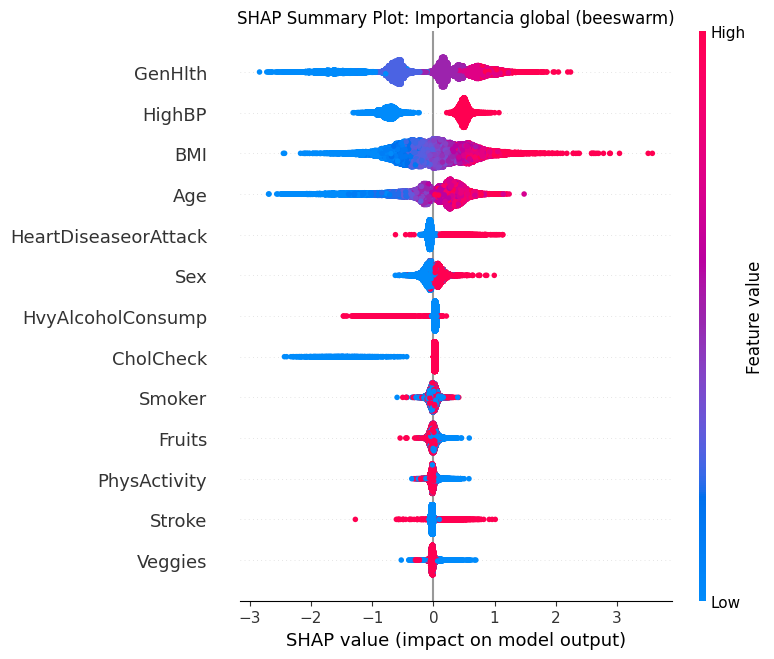

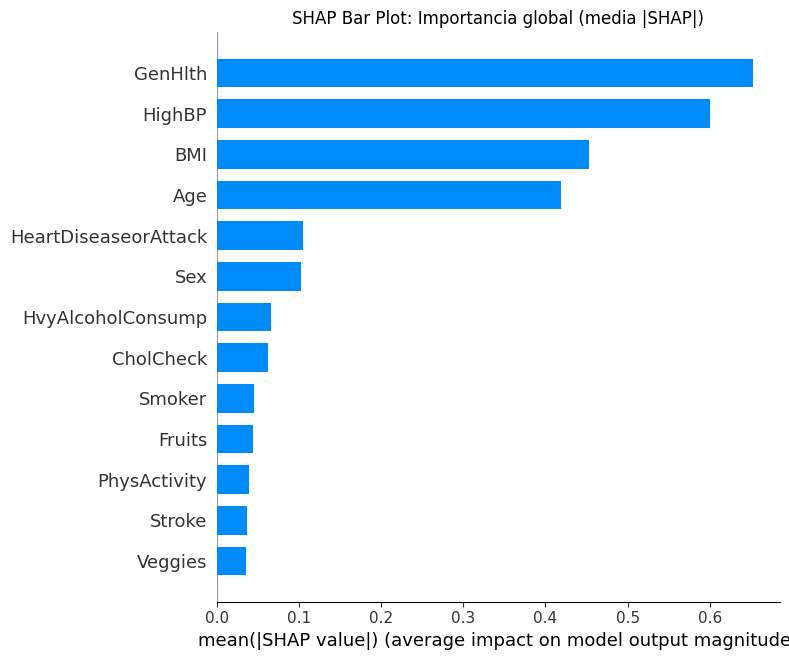

In [30]:
# Asumiendo que ya tienes definidos:
# - shap_values (Explanation object de SHAP con .values)
# - X_test_transformed (DataFrame con features transformadas)
# - feature_names (lista de nombres de columnas)
# - numpy como np, matplotlib.pyplot como plt, pandas como pd, y shap importados

# 1. Summary plot (beeswarm) para importancia global
shap.summary_plot(
    shap_values.values,
    X_test_transformed,
    feature_names=feature_names,
    show=False
)
plt.title('SHAP Summary Plot: Importancia global (beeswarm)')
plt.tight_layout()
plt.show()

# 2. Bar plot para importancia global (media de |SHAP values|)
shap.summary_plot(
    shap_values.values,
    X_test_transformed,
    feature_names=feature_names,
    plot_type='bar',
    max_display=len(feature_names),
    show=False
)
plt.title('SHAP Bar Plot: Importancia global (media |SHAP|)')
plt.tight_layout()
plt.show()


Cada punto del beeswarm representa una instancia (un caso/paciente) y su contribución al modelo por esa feature, es decir, como varía el impacto de esa feature en las predicciones del modelo.
La posición en el eje x es el valor SHAP, es decir, la contribución de la variable a la predicción y el color indica el valor real de la feautre en la instancia. Además, la dispersión horizontal de la nube captura la variabilidad de cómo esa feature afecta al modelo a través de la población, por ejemplo, variables con nubes más anchas tienen efectos muy diversos según el paciente

Cabe destacar que en el eje vertical las features están ordenadas de arriba a abajo por la media de sus valores absolutos de SHAP.






### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [31]:
# imprime la lista de columnas reales tras el preprocesamiento
print("feature_names:", feature_names)
print("X_test_transformed.columns:", X_test_transformed.columns.tolist())


feature_names: ['Age' 'Sex' 'CholCheck' 'BMI' 'Smoker' 'HeartDiseaseorAttack'
 'PhysActivity' 'Fruits' 'Veggies' 'HvyAlcoholConsump' 'GenHlth' 'Stroke'
 'HighBP']
X_test_transformed.columns: ['Age', 'Sex', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'Stroke', 'HighBP']


Top-5 bases: ['GenHlth', 'HighBP', 'BMI', 'Age', 'HeartDiseaseorAttack']
Top-5 reales: ['GenHlth', 'HighBP', 'BMI', 'Age', 'HeartDiseaseorAttack']


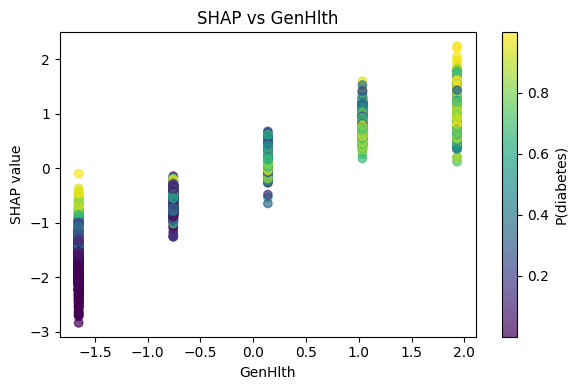

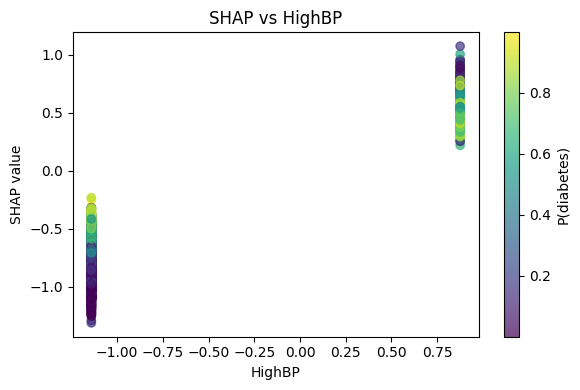

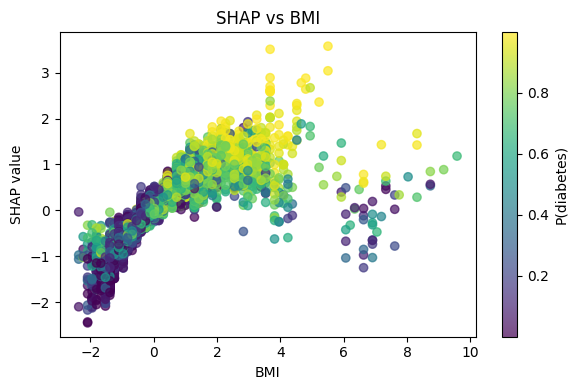

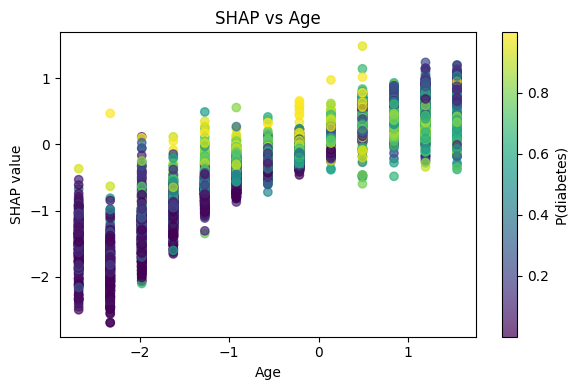

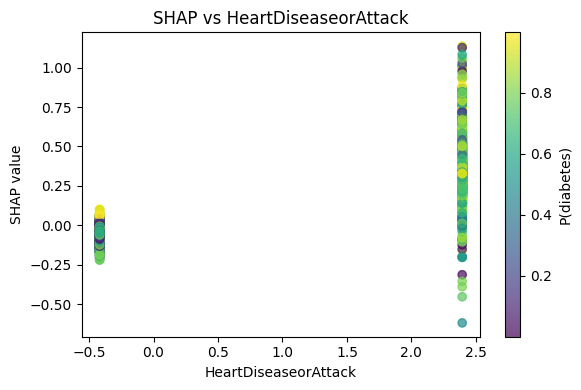

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# — 0. Prepara tu array de SHAP si no lo es ya —
shap_arr = shap_values if isinstance(shap_values, np.ndarray) else shap_values.values
feature_names = list(feature_names)

# — 1. Identificar top-5 features por importancia global —
shap_abs_mean = np.mean(np.abs(shap_arr), axis=0)
importances  = pd.Series(shap_abs_mean, index=feature_names).sort_values(ascending=False)
top5_bases  = importances.head(5).index.tolist()
print("Top-5 bases:", top5_bases)

# — 2. Mapear cada base a la(s) columna(s) real(es) en X_test_transformed —
mapped_top5 = []
for base in top5_bases:
    if base in feature_names:
        # Si existe tal cual, la usamos
        mapped_top5.append(base)
    else:
        # Busca dummies que empiecen por "base_"
        matches = [c for c in feature_names if c.startswith(f"{base}_")]
        if matches:
            # Agrega todas las coincidencias (o elige matches[0] si prefieres una sola)
            mapped_top5.extend(matches)
        else:
            print(f"¡Ojo! No encontré columnas que empiecen por '{base}'")

print("Top-5 reales:", mapped_top5)

# — 3. Calcular probabilidades de clase positiva (sigmoid de margins) —
base_value = explainer.expected_value
if isinstance(base_value, (list, np.ndarray)):
    base_value = base_value[-1]
margins = base_value + np.sum(shap_arr, axis=1)
probs   = 1 / (1 + np.exp(-margins))

# — 4. Dibujar un scatter plot para cada feature mapeada (hasta 5) —
for feat in mapped_top5[:5]:
    idx = feature_names.index(feat)
    plt.figure(figsize=(6,4))
    sc = plt.scatter(
        x_test_transformed[feat],  # valor real de la columna transformada
        shap_arr[:, idx],          # SHAP value correspondiente
        c=probs,                   # coloreado por probabilidad
        cmap='viridis',
        alpha=0.7
    )
    plt.colorbar(sc, label='P(diabetes)')
    plt.xlabel(feat)
    plt.ylabel('SHAP value')
    plt.title(f'SHAP vs {feat}')
    plt.tight_layout()
    plt.show()



In [33]:
print(len(feature_names), feature_names)


13 ['Age', 'Sex', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'Stroke', 'HighBP']


Los resultados del análisis SHAP indican que las variables más influyentes sobre la predicción de diabetes son la salud general (GenHlth), el índice de masa corporal (BMI), presión arterial alta (HighBP), edad (Age) y antecedentes de enfermedades cardíacas (HeartDiseaseorAttack). Se observa claramente que una peor condición de salud general y un mayor índice de masa corporal incrementan significativamente la probabilidad de diabetes, mientras que el efecto de la edad sugiere relaciones más complejas que requieren exploración adicional. Estos hallazgos aportan interpretabilidad al modelo y destacan áreas clave para futuras investigaciones sobre interacciones entre atributos específicos.

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

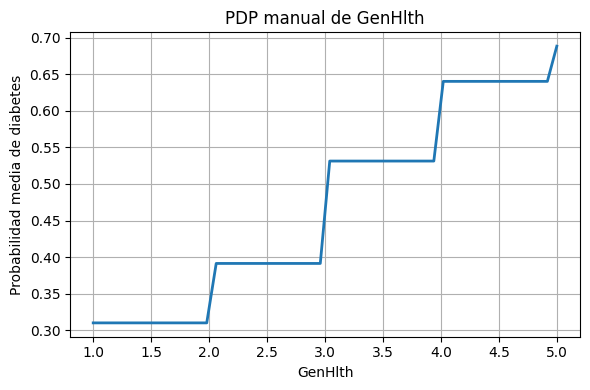

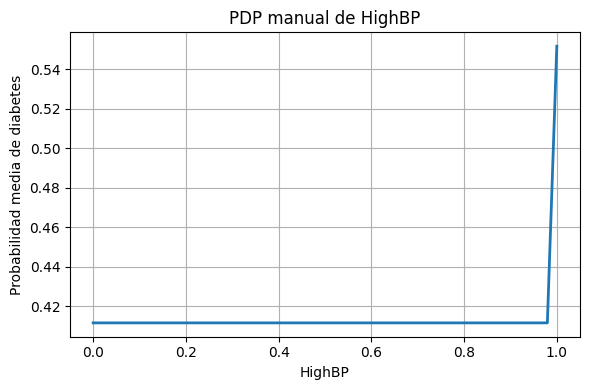

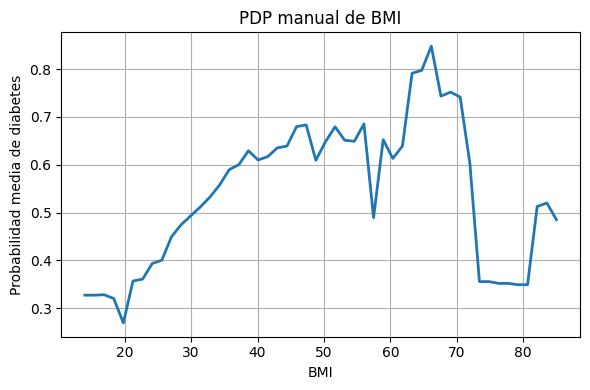

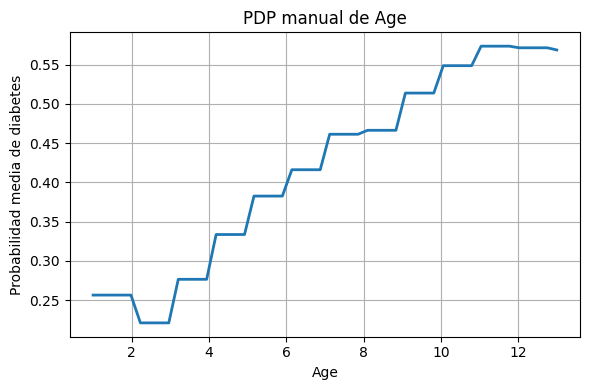

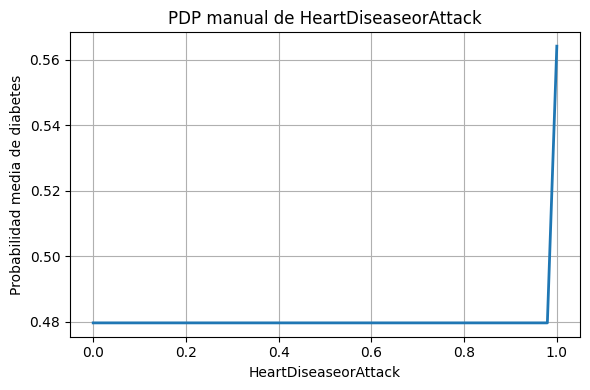

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# 0) Define tu top-5 ya calculado
top5 = importances.head(5).index.tolist()

# 1) Submuestra de 1000 del X_test original (sin transformar)
x_sub = x_test.sample(n=1000, random_state=42).reset_index(drop=True)

# 2) Para cada feature en el top-5:
for feat in top5:
    # 2.1) Grid de 50 valores entre mínimo y máximo observados
    grid = np.linspace(x_sub[feat].min(), x_sub[feat].max(), 50)
    avg_preds = []

    # 2.2) Para cada valor en el grid, fija la columna y predice
    for val in grid:
        x_temp = x_sub.copy()
        x_temp[feat] = val
        # pipeline incluye preprocessing + clf
        preds = pipeline.predict_proba(x_temp)[:, 1]
        avg_preds.append(preds.mean())

    # 3) Graficar la curva PDP manual
    plt.figure(figsize=(6,4))
    plt.plot(grid, avg_preds, linewidth=2)
    plt.xlabel(feat)
    plt.ylabel('Probabilidad media de diabetes')
    plt.title(f'PDP manual de {feat}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


La relación observada en los gráficos Partial Dependence Plot (PDP) indica claramente que a medida que empeora la condición de salud general (GenHlth), aumenta la presión arterial alta (HighBP), incrementa el índice de masa corporal (BMI) y se tienen antecedentes de enfermedades cardíacas (HeartDiseaseorAttack), se incrementa también la probabilidad promedio predicha de padecer diabetes. La variable edad (Age) presenta una relación creciente en términos generales, aunque con un patrón menos lineal y más escalonado. Sin embargo, estas conclusiones, obtenidas de una submuestra de 1000 observaciones, podrían no ser completamente generalizables al conjunto completo de datos, dado que la muestra podría no capturar adecuadamente toda la variabilidad del conjunto original. Por tanto, los resultados deben interpretarse con cautela y sería recomendable validar estos patrones utilizando la totalidad de los datos disponibles.

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [35]:
!pip install alibi

In [36]:
from alibi.explainers import AnchorTabular

In [47]:
import numpy as np

# 1) Defino mis reglas sobre el X_test original (columnas como realmente existen)
rules = {
    'R1_BMI>30':     x_test['BMI']     > 30,
    'R2_Age>50':     x_test['Age']     > 50,
    'R3_GenHlth>=4': x_test['GenHlth'] >= 4,
}

# 2) Función para explicar una observación por posición
def explain_pos(pos):
    # cojo la fila pos-ésima con iloc
    row = x_test.iloc[[pos]]             # DataFrame 1×n
    pred = pipeline.predict(row)[0]      # predicción del modelo
    # miro qué reglas se activan en esa posición
    active = [name for name, mask in rules.items() if mask.iloc[pos]]
    print(f"Obs en posición {pos} → Predicción modelo: {pred}   Reglas activas: {active}")

# 3) Explico las posiciones 1000, 3001 y 5751
for pos in (1000, 3001, 5751):
    explain_pos(pos)
print()

# 4) Cobertura de las reglas (proporción de test cubierto)
covered  = np.logical_or.reduce(list(rules.values()))
coverage = covered.mean()
print(f"Cobertura de las reglas: {coverage:.1%} del test")

# 5) Precisión sobre los cubiertos
y_pred    = pipeline.predict(x_test)
precision = (y_pred[covered] == 1).mean()
print(f"Precisión de las reglas sobre los cubiertos: {precision:.1%}")


Obs en posición 1000 → Predicción modelo: 1   Reglas activas: ['R1_BMI>30', 'R3_GenHlth>=4']
Obs en posición 3001 → Predicción modelo: 1   Reglas activas: ['R1_BMI>30']
Obs en posición 5751 → Predicción modelo: 0   Reglas activas: ['R1_BMI>30']

Cobertura de las reglas: 51.1% del test
Precisión de las reglas sobre los cubiertos: 79.8%


In [43]:
print(x_test.columns.tolist())


['Age', 'Sex', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'Stroke', 'HighBP']


Las reglas propuestas permiten explicar las predicciones del modelo para aproximadamente el 51,1% del conjunto de datos con una precisión del 79,8%. Esto indica que más de la mitad de las observaciones pueden ser explicadas con estas reglas simplificadas, con una precisión bastante aceptable considerando la reducción en complejidad. Respecto a las observaciones específicas analizadas, las reglas tienen sentido, ya que efectivamente capturan características críticas como un índice de masa corporal elevado (BMI > 30) y una mala condición de salud general (GenHlth ≥ 4), factores fuertemente relacionados con diabetes según los análisis previos. Esto fundamenta la utilidad práctica de las reglas, pues resumen eficazmente las relaciones más influyentes del modelo para una comunicación clara y sencilla a los clientes.










# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí
En relación a los métodos utilizados en este laboratorio, aquellos que permiten obtener mejores conclusiones para la tarea de clasificación de diabetes son los métodos globales, como SHAP global y Partial Dependence Plot (PDP). Estos métodos entregan información valiosa sobre cómo diferentes atributos impactan en promedio las predicciones del modelo en todo el conjunto de datos, facilitando la identificación de patrones generales relevantes, como la importancia del índice de masa corporal (BMI) o la salud general (GenHlth).

Por otro lado, para el problema particular del Doctor Simi, quien requiere explicaciones claras, sencillas y específicas para comunicar decisiones a clientes individuales, son más útiles los métodos agnósticos locales como las reglas Anchor. Estos métodos permiten generar explicaciones fáciles de interpretar para observaciones individuales, simplificando la comunicación y permitiendo que el cliente comprenda por qué se tomó una determinada decisión para su caso específico.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>